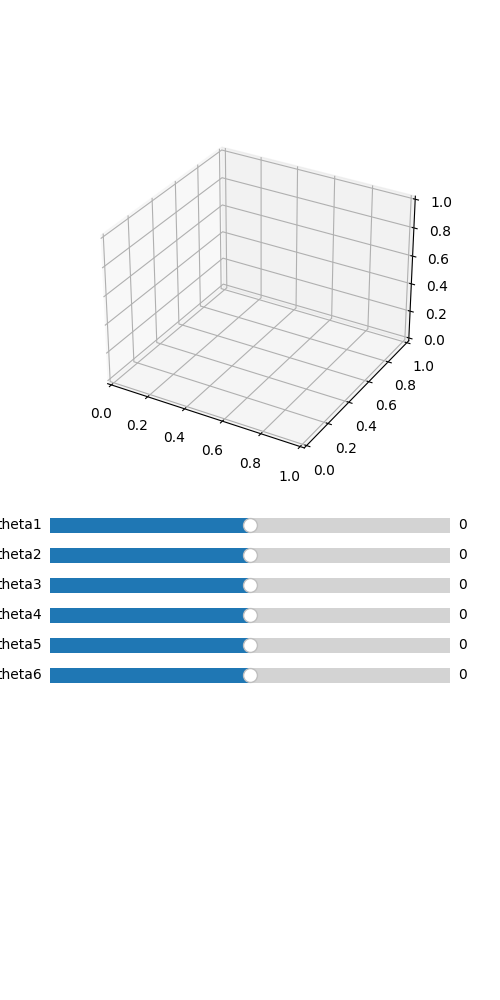

In [1]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from ipywidgets import interact, FloatSlider, IntSlider
from matplotlib.widgets import Slider

%matplotlib widget
# x軸周りに回転する同時変換行列
def Hx(theta):
    return np.array([[1,             0,              0, 0],
                     [0, np.cos(theta), -np.sin(theta), 0],
                     [0, np.sin(theta),  np.cos(theta), 0],
                     [0,             0,              0, 1]])

# y軸周りに回転する同時変換行列
def Hy(theta):
    return np.array([[ np.cos(theta), 0,  np.sin(theta), 0],
                     [             0, 1,              0, 0],
                     [-np.sin(theta), 0,  np.cos(theta), 0],
                     [0,              0,              0, 1]])

# z軸周りに回転する同時変換行列
def Hz(theta):
    return np.array([[np.cos(theta),  -np.sin(theta), 0, 0],
                     [np.sin(theta),   np.cos(theta), 0, 0],
                     [            0,               0, 1, 0],
                     [            0,               0, 0, 1]])

# (x,y,z)方向に並進移動する同時変換行列
def Hp(x, y, z):
    return np.array([[1, 0, 0, x],
                     [0, 1, 0, y],
                     [0, 0, 1, z],
                     [0, 0, 0, 1]])


def Hdh(theta, d, alpha, a):
    return Hz(theta)@Hp(0, 0, d)@Hx(alpha)@Hp(a, 0, 0) # DH法　
    #return Hx(alpha)@Hp(a, 0, 0)@Hz(theta)@Hp(0, 0, d) # 修正DH法

def draw_link_coordinate(ax, Hdh):   
    """
    Hdh : ワールド座標系原点から，N番目のリンク座標原点までの同時変換行列(4×4)
    """
    # n番目のlinkの座標系のx方向の単位ベクトル
    link_x = Hdh@np.array([[1],
                           [0],
                           [0],
                           [1]])
    print(link_x[0][0]**2+link_x[1][0]**2+link_x[2][0]**2)

    # n番目のlinkの座標系のy方向の単位ベクトル
    link_y = Hdh@np.array([[0],
                           [1],
                           [0],
                           [1]])

    # n番目のlinkの座標系のz方向の単位ベクトル
    link_z = Hdh@np.array([[0],
                           [0],
                           [1],
                           [1]])                        

    # ワールド座標系を原点(0,0,0)とした時の，n番目のlinkの原点座標
    x = Hdh[0][3]; y = Hdh[1][3]; z = Hdh[2][3]
    
    # n番目のlinkの座標系をplot (x方向)
    ax.plot([x, link_x[0][0]], [y, link_x[1][0]], [z, link_x[2][0]], "o-", color="red", ms=2) 
    # n番目のlinkの座標系をplot (y方向)
    ax.plot([x, link_y[0][0]], [y, link_y[1][0]], [z, link_y[2][0]], "o-", color="green", ms=2) 
    # n番目のlinkの座標系をplot (z方向)
    ax.plot([x, link_z[0][0]], [y, link_z[1][0]], [z, link_z[2][0]], "o-", color="blue", ms=2)

def main():
    # 描画関連 -----------------------------------
    fig = plt.figure(figsize=(5,10))
    ax1 = fig.add_subplot(2,1,1, projection='3d')

    # 各スライダーの位置を設定
    slider1_pos = plt.axes([0.1, 0.46, 0.8, 0.03]) 
    slider2_pos = plt.axes([0.1, 0.43, 0.8, 0.03])
    slider3_pos = plt.axes([0.1, 0.40, 0.8, 0.03])
    slider4_pos = plt.axes([0.1, 0.37, 0.8, 0.03])
    slider5_pos = plt.axes([0.1, 0.34, 0.8, 0.03])
    slider6_pos = plt.axes([0.1, 0.31, 0.8, 0.03])
    # スライダーの設定
    slider1 = Slider(slider1_pos, 'theta1', -180, 180, valinit=0.0)
    slider2 = Slider(slider2_pos, 'theta2', -180, 180, valinit=0.0)
    slider3 = Slider(slider3_pos, 'theta3', -180, 180, valinit=0.0)
    slider4 = Slider(slider4_pos, 'theta4', -180, 180, valinit=0.0)
    slider5 = Slider(slider5_pos, 'theta5', -180, 180, valinit=0.0)
    slider6 = Slider(slider6_pos, 'theta6', -180, 180, valinit=0.0)
    # 描画関連，一旦ここまで --------------------------
    
    def update(val):
        ax1.clear()

        # スライダーの値を獲得
        theta1 = slider1.val
        theta2 = slider2.val
        theta3 = slider3.val
        theta4 = slider4.val
        theta5 = slider5.val
        theta6 = slider6.val

        # ここからDH法の実装 ------------------------
        l1 = 4.0; l2 = 4.0; l3 = 2.0

        # DH法による同時変換行列 0->1
        theta1 = np.radians(theta1); d1 = 0; alpha1 = -np.pi/2; a1 = 0
        Hdh01 = Hdh(theta1, d1, alpha1, a1) 
        # DH法による同時変換行列 1->2
        theta2 = np.radians(theta2); d2 = 0; alpha2 =0; a2 = l1
        Hdh12 = Hdh(theta2, d2, alpha2, a2) 
        # DH法による同時変換行列 2->3
        theta3 = np.radians(theta3); d3 = 0; alpha3 = np.pi/2; a3 = 0
        Hdh23 = Hdh(theta3, d3, alpha3, a3) 
        # DH法による同時変換行列 3->4
        theta4 = np.radians(theta4); d4 = l2; alpha4 = -np.pi/2; a4 = 0
        Hdh34 = Hdh(theta4, d4, alpha4, a4) 
        # DH法による同時変換行列 4->5
        theta5 = np.radians(theta5); d5 = 0; alpha5 = np.pi/2; a5 = 0
        Hdh45 = Hdh(theta5, d5, alpha5, a5) 
        # DH法による同時変換行列 5->6
        theta6 = np.radians(theta6); d6 = l3; alpha6 = 0; a6 = 0
        Hdh56 = Hdh(theta6, d6, alpha6, a6)     
        
        # ワールド座標系からn番目のlinkまでの同時変換行列を定義
        # ワールド->link2 (=ワールド->link1->link2)
        Hdh012     = Hdh01     @ Hdh12 
        # ワールド->link3 (=ワールド->link1->link2->link3)
        Hdh0123    = Hdh012    @ Hdh23 
        # ワールド->link4 (=ワールド->link1->link2->link3->link4)
        Hdh01234   = Hdh0123   @ Hdh34 
        # ワールド->link5 (=ワールド->link1->link2->link3->link4->リンク5)
        Hdh012345  = Hdh01234  @ Hdh45 
        # ワールド->link6 (=ワールド->link1->link2->link3->link4->リンク5->リンク6)
        Hdh0123456 = Hdh012345 @ Hdh56 
        
        # 各linkの原点座標
        o0 = [             0.0,              0.0,              0.0] # ワールド座標
        o1 = [     Hdh01[0][3],      Hdh01[1][3],      Hdh01[2][3]] # link1の原点座標
        o2 = [    Hdh012[0][3],     Hdh012[1][3],     Hdh012[2][3]] # link2の原点座標
        o3 = [   Hdh0123[0][3],    Hdh0123[1][3],    Hdh0123[2][3]] # link3の原点座標
        o4 = [  Hdh01234[0][3],   Hdh01234[1][3],   Hdh01234[2][3]] # link4の原点座標
        o5 = [ Hdh012345[0][3],  Hdh012345[1][3],  Hdh012345[2][3]] # link5の原点座標
        o6 = [Hdh0123456[0][3], Hdh0123456[1][3], Hdh0123456[2][3]] # link6の原点座標
        # ここまでDH法の実装 -----------------------------------------------------


        # 以下，描画関連 ---------------------------------
        # 各linkの描画（dh法に基づいたlinkなので，長さが0になるlinkが出現する可能性があることに注意）
        # ax.plot([n-1番目のlinkの原点座標(x方向), n番目のlinkの原点座標（x方向）], [n-1番目のlinkの原点座標(y方向), n番目のlinkの原点座標（y方向）], [n-1番目のlinkの原点座標(z方向), n番目のlinkの原点座標（z方向）])
        ax1.plot([o0[0], o1[0]], [o0[1], o1[1]], [o0[2], o1[2]], "-", color="tomato", ms=6) # link1
        ax1.plot([o1[0], o2[0]], [o1[1], o2[1]], [o1[2], o2[2]], "-", color="lightgreen", ms=6) # link2
        ax1.plot([o2[0], o3[0]], [o2[1], o3[1]], [o2[2], o3[2]], "-", color="cyan", ms=6) # link3
        ax1.plot([o3[0], o4[0]], [o3[1], o4[1]], [o3[2], o4[2]], "-", color="purple", ms=6) # link4
        ax1.plot([o4[0], o5[0]], [o4[1], o5[1]], [o4[2], o5[2]], "-", color="gold", ms=6) # link5
        ax1.plot([o5[0], o6[0]], [o5[1], o6[1]], [o5[2], o6[2]], "-", color="mediumslateblue", ms=6) # link6
        
        # 各linkの座標軸を描画
        draw_link_coordinate(ax1,      Hdh01)
        draw_link_coordinate(ax1,     Hdh012)
        draw_link_coordinate(ax1,    Hdh0123)
        draw_link_coordinate(ax1,   Hdh01234)
        draw_link_coordinate(ax1,  Hdh012345)
        draw_link_coordinate(ax1, Hdh0123456)
        
        # 範囲設定
        ax1.set_xlim(-5, 5)
        ax1.set_ylim(-5, 5)
        ax1.set_zlim(-5, 5)

        # 軸ラベル
        ax1.set_xlabel('x')
        ax1.set_ylabel('y')
        ax1.set_zlabel('z')

    # スライダーが操作されると，関数updateが呼び出される
    slider1.on_changed(update) 
    slider2.on_changed(update) 
    slider3.on_changed(update) 
    slider4.on_changed(update) 
    slider5.on_changed(update) 
    slider6.on_changed(update) 

    plt.show()



if __name__ == '__main__':
    main()